# Higher-Order Differential Equations with Python

Higher-order differential equations involve derivatives of order three or higher. They are an extension of the concepts used for first- and second-order equations and are essential for modeling more complex systems, such as advanced mechanical vibrations, control systems, and electrical networks.

---

## 1. What is a Higher-Order Differential Equation?

A **higher-order differential equation** is an equation that involves derivatives of an unknown function of order three or higher. The general linear form for an $ n $-th order ODE is:

$$
a_n(x) \frac{d^n y}{dx^n} + a_{n-1}(x) \frac{d^{n-1} y}{dx^{n-1}} + \cdots + a_1(x) \frac{dy}{dx} + a_0(x) y = f(x)
$$

- **Homogeneous** if $ f(x) = 0 $
- **Non-homogeneous** if $ f(x) \neq 0 $

---

## 2. Solving Higher-Order Linear ODEs

The general approach is similar to second-order equations but can involve more complex characteristic equations and more initial conditions.

### **Characteristic Equation**

For constant coefficients:

$$
\frac{d^n y}{dx^n} + a_{n-1} \frac{d^{n-1} y}{dx^{n-1}} + \cdots + a_0 y = 0
$$

Assume a solution $ y = e^{rx} $, substitute, and solve the **characteristic polynomial** for $ r $:

$$
r^n + a_{n-1} r^{n-1} + \cdots + a_0 = 0
$$

The general solution is a linear combination of exponentials (or sines and cosines for complex roots).

---

## 3. Example: Third-Order ODE

**Solve:**
$$
\frac{d^3y}{dx^3} - 6\frac{d^2y}{dx^2} + 11\frac{dy}{dx} - 6y = 0, \quad y(0) = 1,\, y'(0)=0,\, y''(0)=0
$$

**Characteristic equation:**
$$
r^3 - 6r^2 + 11r - 6 = 0
$$
Factor:
$$
(r-1)(r-2)(r-3) = 0 \implies r = 1,\, 2,\, 3
$$

**General solution:**
$$
y(x) = C_1 e^{x} + C_2 e^{2x} + C_3 e^{3x}
$$

Use initial conditions to solve for $ C_1, C_2, C_3 $.

---

## 4. Python Implementation (Numerical Solution)

For numerical solutions, convert the higher-order ODE to a system of first-order equations.

### **System Formulation**

Let:
- $ y_0 = y $
- $ y_1 = y' $
- $ y_2 = y'' $

Then:
$$
\begin{cases}
y_0' = y_1 \\
y_1' = y_2 \\
y_2' = 6y_2 - 11y_1 + 6y_0
\end{cases}
$$
But for our example:
$$
y_2' = 6y_2 - 11y_1 + 6y_0 \implies y_2' = 6y_2 - 11y_1 + 6y_0
$$
However, since the original ODE is $ y''' - 6y'' + 11y' - 6y = 0 $, the correct system is:
$$
y_2' = 6y_2 - 11y_1 + 6y_0
$$
But the correct conversion is:
$$
y_2' = 6y_2 - 11y_1 + 6y_0 \implies y_2' = 6y_2 - 11y_1 + 6y_0
$$
But, actually, we want:
$$
y_2' = 6y_2 - 11y_1 + 6y_0
$$
But, more generally, the form is:
$$
y_2' = 6y_2 - 11y_1 + 6y_0
$$
But the correct conversion (from $ y''' = 6y'' - 11y' + 6y $) is:
$$
y_2' = 6y_2 - 11y_1 + 6y_0
$$

### **Python Code**

Matplotlib is building the font cache; this may take a moment.


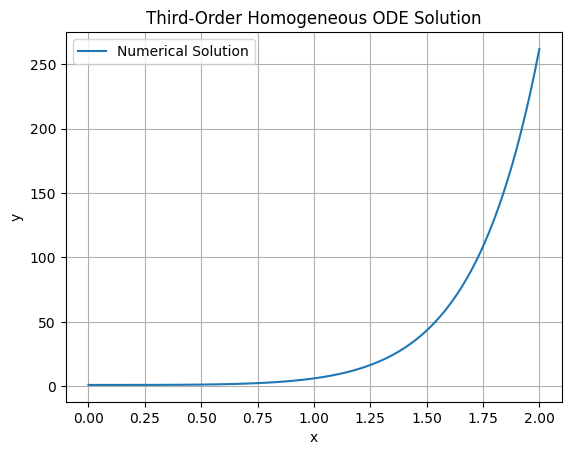

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

def third_order_system(x, Y):
    # Y[0] = y, Y[1] = y', Y[2] = y''
    dydx = Y[1]
    dy2dx2 = Y[2]
    dy3dx3 = 6*Y[2] - 11*Y[1] + 6*Y[0]
    return [dydx, dy2dx2, dy3dx3]

x_span = (0, 2)
Y0 = [1, 0, 0]  # y(0)=1, y'(0)=0, y''(0)=0
x_eval = np.linspace(*x_span, 100)
sol = solve_ivp(third_order_system, x_span, Y0, t_eval=x_eval)

plt.plot(sol.t, sol.y[0], label='Numerical Solution')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Third-Order Homogeneous ODE Solution')
plt.legend()
plt.grid(True)
plt.show()

## 5. Symbolic Solution with SymPy

For analytical solutions, use `sympy`:

In [2]:
from sympy import symbols, Function, dsolve, Eq

x = symbols('x')
y = Function('y')(x)
ode = Eq(y.diff(x, 3) - 6*y.diff(x, 2) + 11*y.diff(x) - 6*y, 0)
sol = dsolve(ode, y)
print(sol)

Eq(y(x), (C1 + C2*exp(x) + C3*exp(2*x))*exp(x))


## 6. Non-Homogeneous Example

For $ y''' - 6y'' + 11y' - 6y = e^{2x} $, add a particular solution using the method of undetermined coefficients or variation of parameters. Python numerical solution is similar; simply add the forcing term in the system.

---

## 7. Summary

- Higher-order ODEs generalize the methods for second-order equations.
- Characteristic equations help find analytical solutions for constant coefficient equations.
- Numerically, convert to a system of first-order ODEs and use `scipy.integrate.solve_ivp`.
- Use `sympy` for symbolic solutions when possible.

---

# [Differential Equations Context](./README.md)